# __Customer Segmentation__

## 1-Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('/content/mall_customers.csv')

In [4]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [12]:
df.shape

(200, 5)

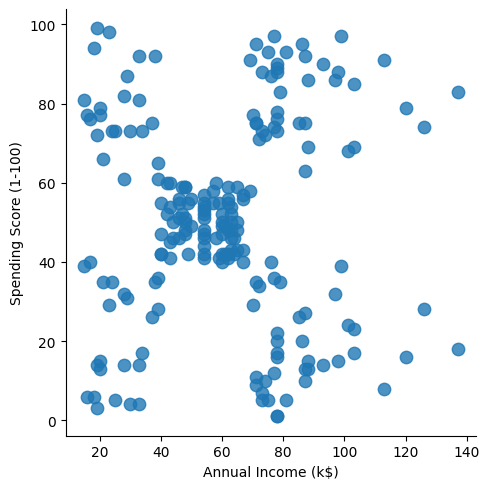

In [5]:
sns.lmplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)' , fit_reg=False, scatter_kws={'s': 80})

<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

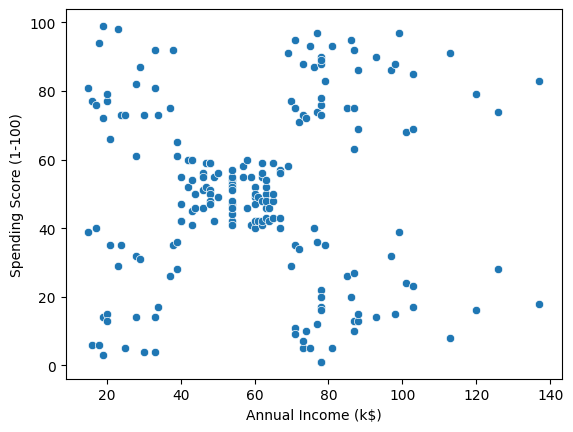

In [7]:
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)' )

In [8]:
from sklearn.cluster import KMeans

In [48]:
model = KMeans(n_clusters = 5)

In [49]:
model.fit( df[  ['Annual Income (k$)', 'Spending Score (1-100)']   ] )

KMeans(n_clusters=5)

In [50]:
model.labels_

array([3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 4,
       3, 1, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 2, 0, 2, 4, 2, 0, 2, 0, 2,
       4, 2, 0, 2, 0, 2, 0, 2, 0, 2, 4, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2], dtype=int32)

In [51]:
df['cluster'] = model.labels_

In [52]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster
0,1,Male,19,15,39,3
1,2,Male,21,15,81,1
2,3,Female,20,16,6,3
3,4,Female,23,16,77,1
4,5,Female,31,17,40,3


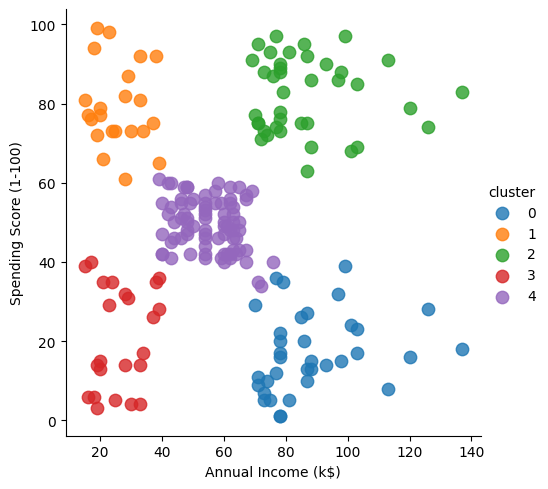

In [53]:
sns.lmplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)', hue='cluster' , fit_reg=False, scatter_kws={'s': 80} )

In [30]:
model.inertia_

19740.0103703593

In [34]:
intra_dist  = []

for k in range(1,21):
    model = KMeans(n_clusters = k)
    model.fit( df[  ['Annual Income (k$)', 'Spending Score (1-100)']   ] )
    #print(model.inertia_)
    intra_dist.append(model.inertia_)

intra_dist

[269981.28,
 181363.59595959593,
 106348.37306211122,
 73679.78903948836,
 44448.4554479337,
 37239.835542456036,
 30241.34361793658,
 24995.96978113596,
 21862.092672182895,
 19704.12354314778,
 18090.949093539304,
 16019.406429681432,
 14548.916492110035,
 12822.326051889286,
 11696.848903289694,
 10920.51411668042,
 10313.72262089762,
 9305.020238095236,
 8482.191823454323,
 8042.434115884114]

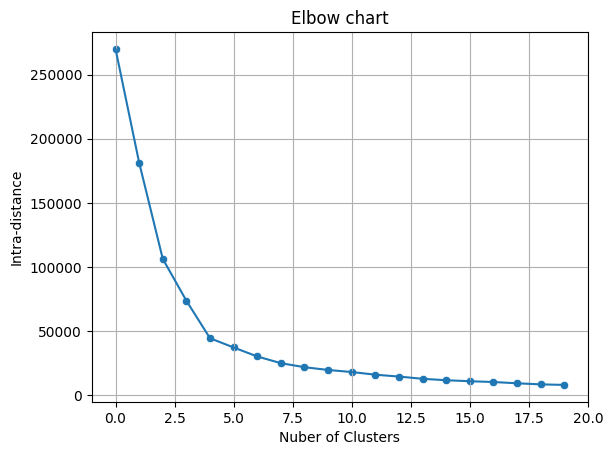

In [47]:
sns.lineplot(data=intra_dist)
sns.scatterplot(data=intra_dist)
plt.grid(True)
plt.xlabel('Nuber of Clusters')
plt.ylabel('Intra-distance')
plt.title('Elbow chart')
plt.xlim(-1,20)
plt.show()

In [58]:
#df0 = df[  df['cluster']==0  ][ ['Annual Income (k$)', 'Spending Score (1-100)'] ]
#df1 = df[  df['cluster']==1  ][ ['Annual Income (k$)', 'Spending Score (1-100)'] ]
#df2 = df[  df['cluster']==2  ][ ['Annual Income (k$)', 'Spending Score (1-100)'] ]
#df3 = df[  df['cluster']==3  ][ ['Annual Income (k$)', 'Spending Score (1-100)'] ]
#df4 = df[  df['cluster']==4  ][ ['Annual Income (k$)', 'Spending Score (1-100)'] ]

<Axes: xlabel='cluster', ylabel='Annual Income (k$)'>

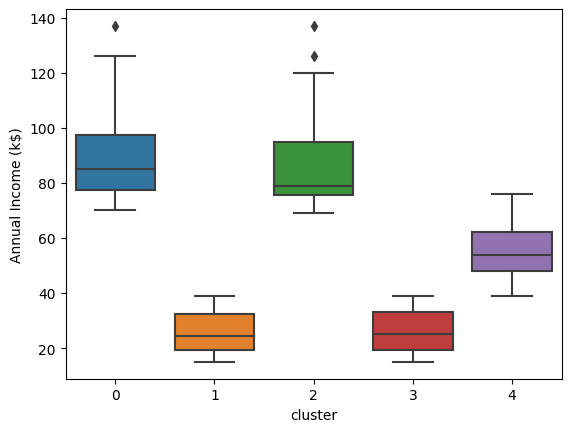

In [59]:
sns.boxplot(data=df, x='cluster', y='Annual Income (k$)')

<Axes: xlabel='cluster', ylabel='Spending Score (1-100)'>

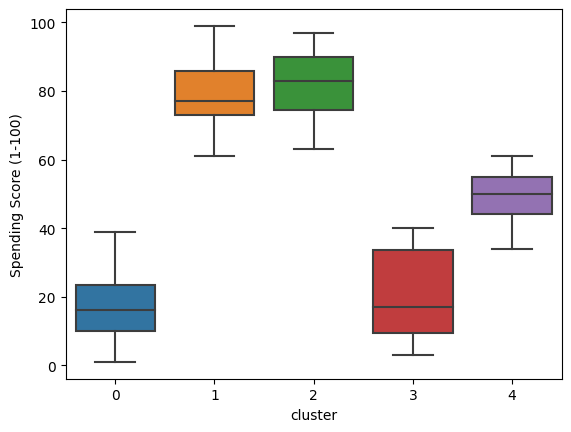

In [60]:
sns.boxplot(data=df, x='cluster', y='Spending Score (1-100)')

<Axes: xlabel='cluster', ylabel='Age'>

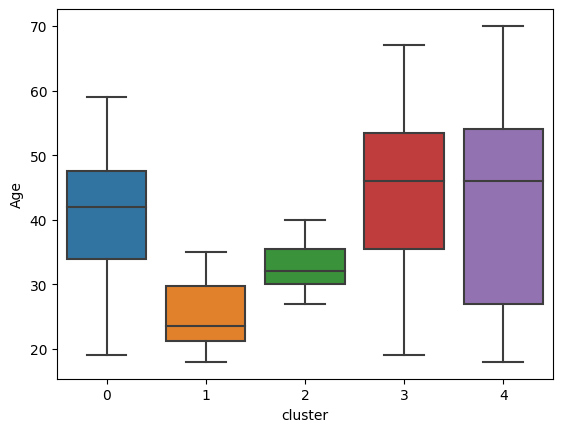

In [61]:
sns.boxplot(data=df, x='cluster', y='Age')

<Axes: xlabel='cluster', ylabel='Age'>

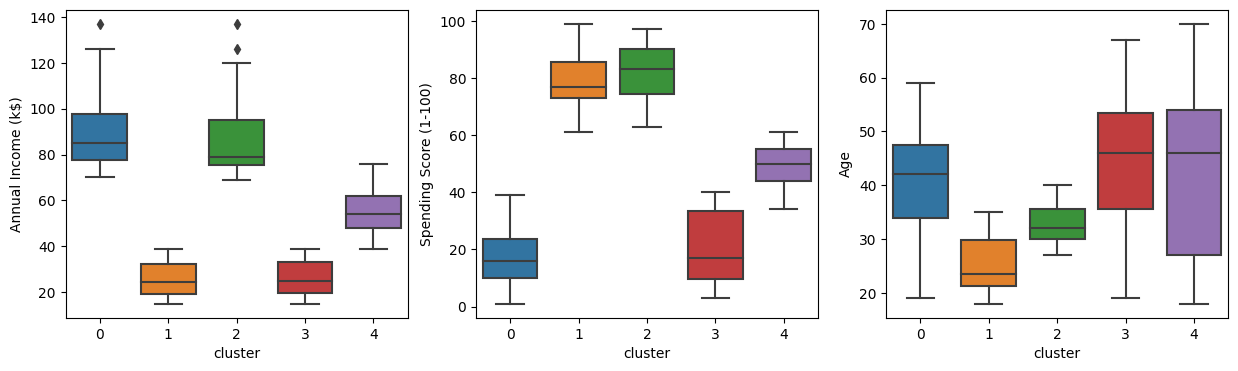

In [68]:
fig , axes =  plt.subplots(1,3, figsize=(15,4))

sns.boxplot( ax=axes[0] ,  data=df, x='cluster', y='Annual Income (k$)')
sns.boxplot( ax=axes[1] ,  data=df, x='cluster', y='Spending Score (1-100)')
sns.boxplot( ax=axes[2] ,  data=df, x='cluster', y='Age')